In [1]:
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import wrangle
import env

Exploration Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.



In [2]:
df = wrangle.wrangle_telco()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB



1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
# split from wrange function

train, validate, test = wrangle.split_data(df)

train -> (949, 4)
validate -> (407, 4)
test -> (339, 4)


In [6]:
telco_corr = train.drop(columns=['customer_id']).corr()
telco_corr

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.424806,0.941523
tenure,0.424806,1.000000,0.650009
total_charges,0.941523,0.650009,1.000000


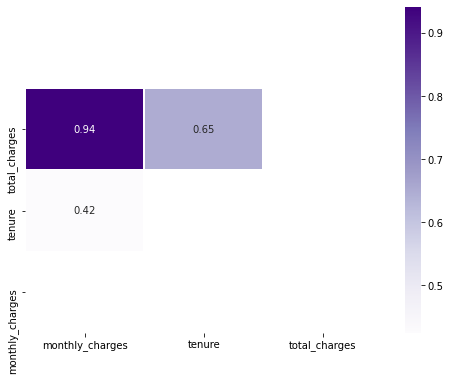

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(telco_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(telco_corr))
plt.ylim(0, 4)

plt.show()


In [8]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(train.monthly_charges, train.total_charges)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9415226412886776
P-value: 0.0


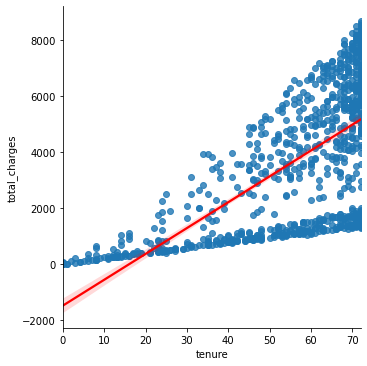

In [9]:
# add regression line to scatter plot

sns.lmplot(y="total_charges", x="tenure", data=train, line_kws={'color': 'red'})
plt.show()


2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair

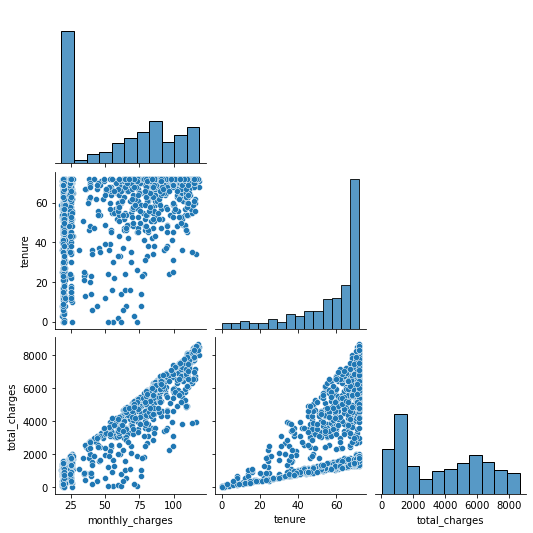

In [10]:
# regular pairplot

sns.pairplot(train[['monthly_charges', 'tenure', 'total_charges']], corner=True)
plt.show()

In [11]:
# turn into function with gridline

def plot_variable_pairs(df):
    columns = df[list(df.select_dtypes(exclude = 'O').columns)]
    sns.set(style='whitegrid', palette='muted')
    g = sns.PairGrid(columns)
    g = g.map(sns.regplot, line_kws={'color':'red'})

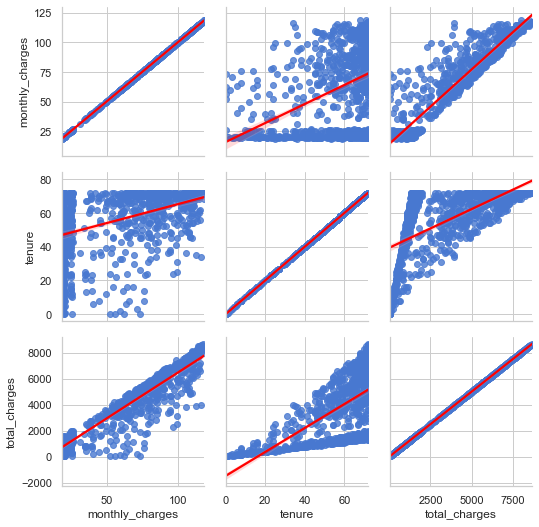

In [12]:
# call function

plot_variable_pairs(train)


3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer

In [13]:
def months_to_years(df):
    '''
    this function accepts the telco churn dataframe
    and returns a dataframe with a new feature in complete years of tenure
    '''
    df['tenure_years'] = (df.tenure/12).astype(int)
    return df

In [14]:
# call function

months_to_years(train)
train.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
1256,7501-IWUNG,73.80,61,4616.05,5
225,1303-SRDOK,69.05,55,3842.60,4
662,3967-VQOGC,24.90,67,1680.25,5
628,3777-XROBG,19.55,58,1079.65,4
824,5075-JSDKI,24.45,59,1493.10,4



4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

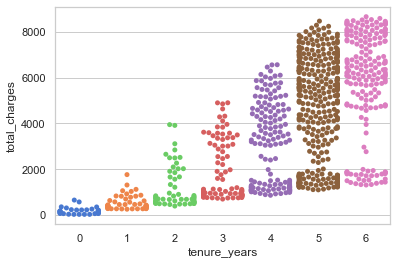

In [15]:
sns.swarmplot(x='tenure_years', y ='total_charges', data=train)

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

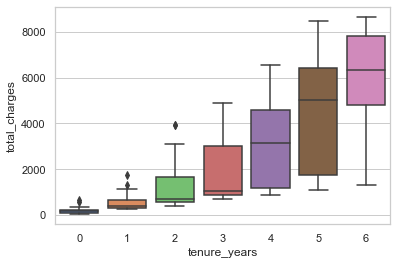

In [16]:
sns.boxplot(x='tenure_years', y ='total_charges', data=train)

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

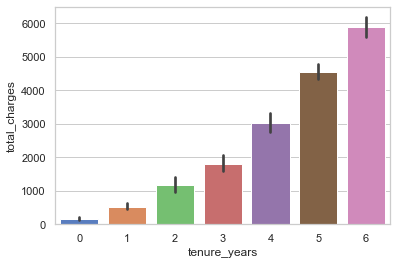

In [17]:
sns.barplot(x='tenure_years', y ='total_charges', data=train)

In [18]:
def plot_categorical_and_continuous_vars(df):
    '''
    this function that accepts your dataframe 
    and the name of the columns that hold the continuous and categorical features 
    outputs: 3 different plots for visualizing a categorical variable and a continuous variable.
    '''
    sns.swarmplot(x='tenure_years', y ='total_charges', data=train)
    plt.show()
    sns.boxplot(x='tenure_years', y ='total_charges', data=train)
    plt.show()
    sns.barplot(x='tenure_years', y ='total_charges', data=train)
    plt.show()

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file

In [21]:
import explore

In [22]:
explore.months_to_years(train).head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
1256,7501-IWUNG,73.80,61,4616.05,5
225,1303-SRDOK,69.05,55,3842.60,4
662,3967-VQOGC,24.90,67,1680.25,5
628,3777-XROBG,19.55,58,1079.65,4
824,5075-JSDKI,24.45,59,1493.10,4


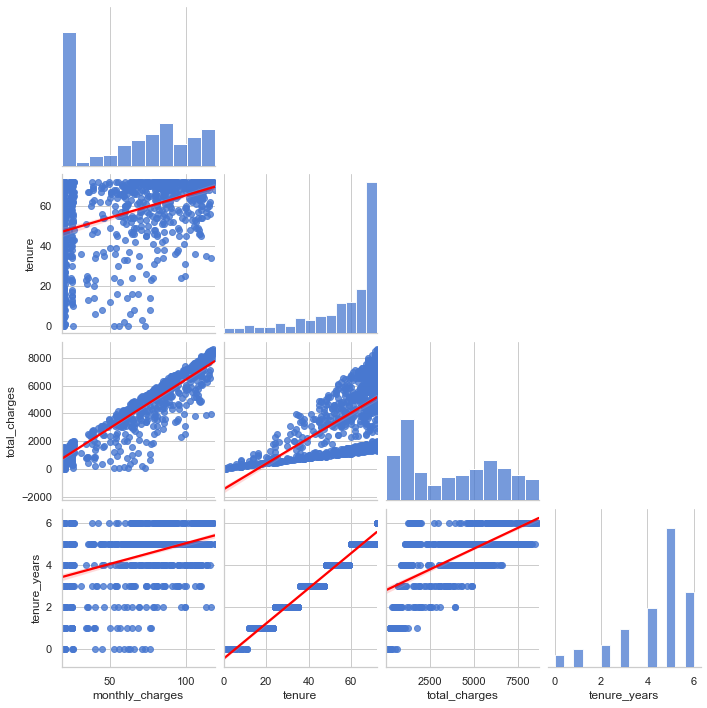

In [24]:
explore.plot_variable_pairs(train, 'tenure_years')

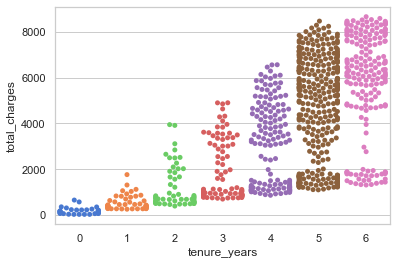

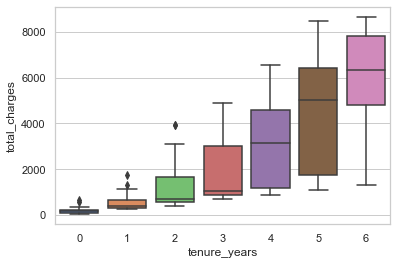

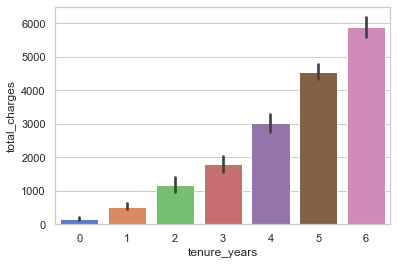

In [25]:
explore.plot_categorical_and_continuous_vars(train, 'tenure_years', 'total_charges')

6. Explore your dataset with any other visualizations you think will be helpful

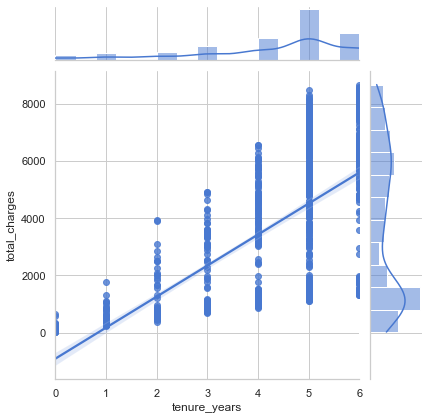

In [26]:
sns.jointplot(x='tenure_years', y ='total_charges', data=train, kind='reg')
plt.show()

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable

In [27]:
import acquire

In [28]:
def get_mall_customers_data():
    '''
    This function reads in the mall_customers data from the Codeup db
    and returns a pandas Dataframe
    '''
    
    mall_customers_query = '''
    SELECT *
    FROM customers
    '''
    return pd.read_sql(mall_customers_query, get_connection('mall_customers'))


In [29]:
# Create helper function to get the necessary connection url

def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [30]:
df= get_mall_customers_data()

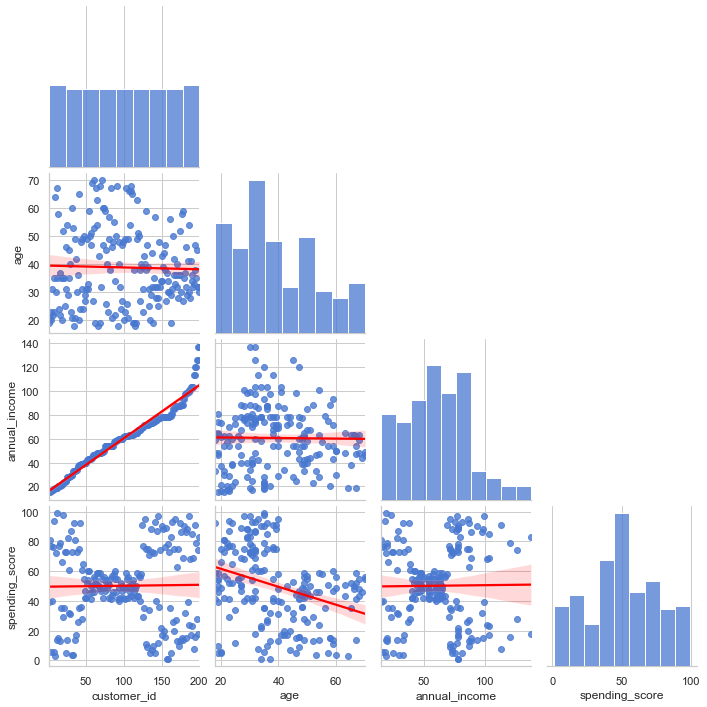

In [31]:
explore.plot_variable_pairs(df, 'spending_score')

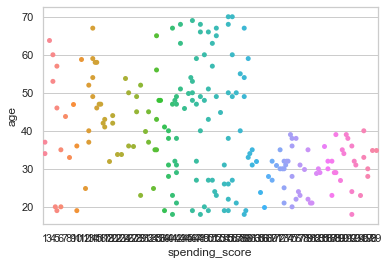

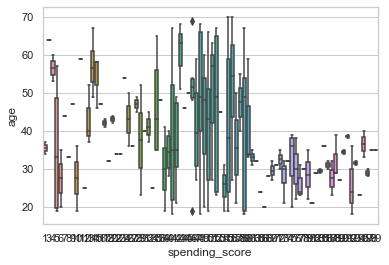

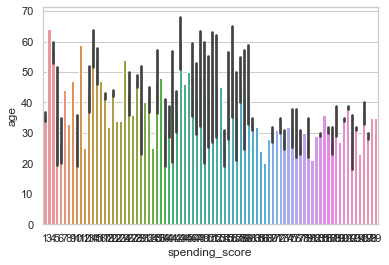

In [32]:
explore.plot_categorical_and_continuous_vars(df, 'spending_score', 'age')

Exercises II - Challenge

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

2. Come up with some initial hypotheses based on your goal of predicting property value.

3. Visualize all combinations of variables in some way.

4. Run the appropriate statistical tests where needed.

5. What independent variables are correlated with the dependent variable, home value?

6. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

7. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.